In [2]:
from numpy import *
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
import sympy
from sympy.physics.wigner import wigner_6j,wigner_3j,clebsch_gordan
import time

from physconsts import *
from rbconsts import *
from amophys import cc

In [36]:
#### functions 

def derivs(y0,t,O1,O2,D1,D2):
    """ Returns RHS of optical bloch eqs for current values at time t"""
    r11,r12,r13,r22,r23,r33 = y0
#     O1,2; D1,2= params # Rabi freq, detuning
    
    # time derivatives of density op elements; non-redundant eqs only
    dr11 = .5*1j*O1*(cc(r12) - r12)
    dr12 = -.5*1j*(O1*r11 + 2*D1*r12 + O2*r13 - O1*r22)
    dr13 = -.5*1j*(O2*r12 + 2*(D1 + D2)*r13 - O1*r23)
    dr22 = .5*1j*(-O1*cc(r12) + O2*cc(r23) + O1*r12 - O2*r23)
    dr23 = .5*1j*(O1*r13 - O2*r22 - 2*D2*r23 + O2*r33)
    dr33 = .5*1j*O2*(r23 - cc(r23))
    
    return array([dr11,dr12,dr13,dr22,dr23,dr33])

In [101]:
#### setup the system

D1 = 1 # arb units
D2 = -1 # two-photon D is 0
O1 = 1 # arb units
O2 = 1

dt = 0.05
t_exp = 10 # experiment duration
t = arange(t_exp,step=dt)

y0 = zeros(6, complex)
y0[0] = 1 + 0j # all population in ground state rho11

func = lambda y,t: derivs(y0,t,O1,O2,D1,D2)

In [102]:
soln = solve_ivp(func,[0,t_exp],y0) #,t_eval=linspace(0,t_exp,50)

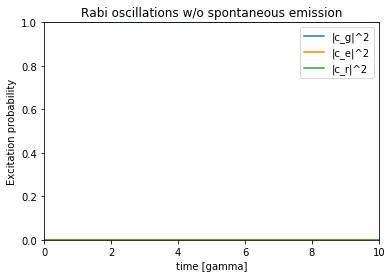

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim((0,1))
ax.set_xlim((0,t_exp))
ax.set_title('Rabi oscillations w/o spontaneous emission')
ax.set_xlabel('time [gamma]')
ax.set_ylabel('Excitation probability')
ax.plot(soln.t,soln.y[0],label='|c_g|^2')
ax.plot(soln.t,soln.y[3],label='|c_e|^2')
ax.plot(soln.t,soln.y[5],label='|c_r|^2')
ax.legend(loc='upper right')
plt.show()

In [104]:
r11,r12,r13,r22,r23,r33 = y0
    
# time derivatives of density op elements; non-redundant eqs only
dr11 = .5*1j*O1*(cc(r12) - r12)
dr12 = -.5*1j*(O1*r11 + 2*D1*r12 + O2*r13 - O1*r22)
dr13 = -.5*1j*(O2*r12 + 2*(D1 + D2)*r13 - O1*r23)
dr22 = .5*1j*(-O1*cc(r12) + O2*cc(r23) + O1*r12 - O2*r23)
dr23 = .5*1j*(O1*r13 - O2*r22 - 2*D2*r23 + O2*r33)
dr33 = .5*1j*O2*(r23 - cc(r23))
    
array([dr11,dr12,dr13,dr22,dr23,dr33])

array([0.+0.j , 0.-0.5j, 0.-0.j , 0.+0.j , 0.+0.j , 0.+0.j ])